## Ground Truth Test

In [1]:
import torch
import torchvision.transforms as transforms              
from torchvision.datasets import CIFAR10      
from torch.utils.data import DataLoader
from src.temperature_scaling import ModelWithTemperature
from src.cifar10h import aps_cifar10h_hist, raps_cifar10h_hist, saps_cifar10h_hist, aps_cifar10h_scatter, raps_cifar10h_scatter, saps_cifar10h_scatter
from src.inception import inception_v3

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

dict_path = "C:\\Users\\jiayang\\ipynb\\trainedModel\\Inception_CIFAR10.pth"
model = inception_v3(pretrained=True, dict_path=dict_path).to(device)

# preprocess the images from CIFAR10
data_transform = transforms.Compose([
    transforms.ToTensor(),       
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))  
])

# load images from CIFAR10
dataset = CIFAR10(root="../data", train=False, download=True, transform=data_transform)

# Temperature Scaling
temp_scal_loader = DataLoader(dataset, batch_size=32, shuffle=True)
model = ModelWithTemperature(model, temperature=5.2).to(device)
model.set_temperature(temp_scal_loader)
model.eval()

# The number of times the experiment is going to be repeated
num_runs = 10

# error rate
alpha = 0.1

Loading weights from: C:\Users\jiayang\ipynb\trainedModel\Inception_CIFAR10.pth
Files already downloaded and verified
Before temperature - NLL: 0.361, ECE: 0.028
Optimal temperature: 5.125
After temperature - NLL: 0.890, ECE: 0.413


APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8694 ± 0.0035
Final Average Prediction Set Size: 0.97 ± 0.01
Final Average Coverage: 0.8946 ± 0.0038
Final Average Real Probability: 0.8665 ± 0.0038


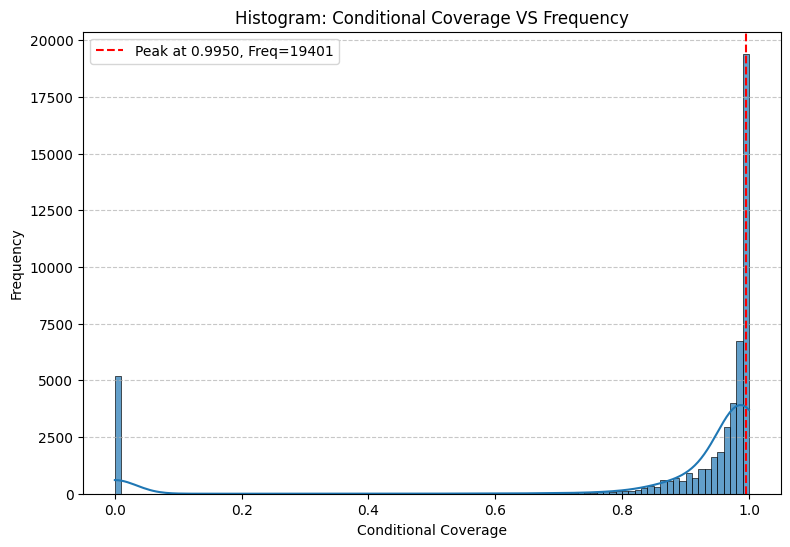

19401 (38.80%) samples reached the peak conditional coverage at 0.9950


In [5]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8696 ± 0.0036
Final Average Prediction Set Size: 0.95 ± 0.01
Final Average Coverage: 0.8944 ± 0.0040
Final Average Real Probability: 0.8652 ± 0.0040


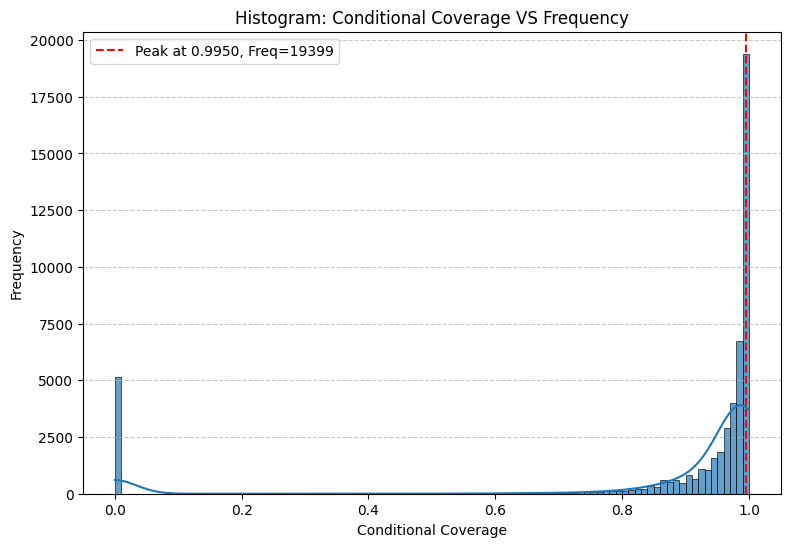

19399 (38.80%) samples reached the peak conditional coverage at 0.9950


In [6]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.8741 ± 0.0043
Final Average Prediction Set Size: 0.92 ± 0.01
Final Average Coverage: 0.8978 ± 0.0048
Final Average Real Probability: 0.8634 ± 0.0046


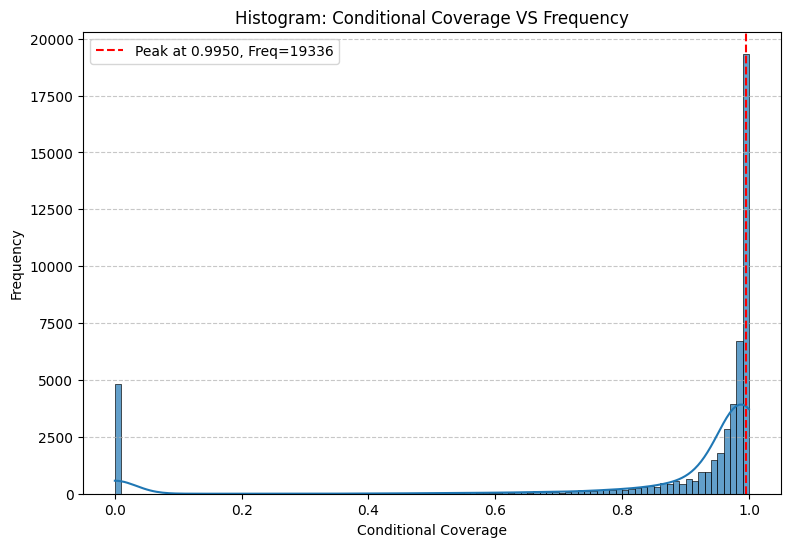

19336 (38.67%) samples reached the peak conditional coverage at 0.9950


In [7]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1)

## Model Test

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5683 ± 0.0035
Final Average Prediction Set Size: 1.83 ± 0.02
Final Average Coverage: 0.8981 ± 0.0039
Final Average Real Probability: 0.8782 ± 0.0036


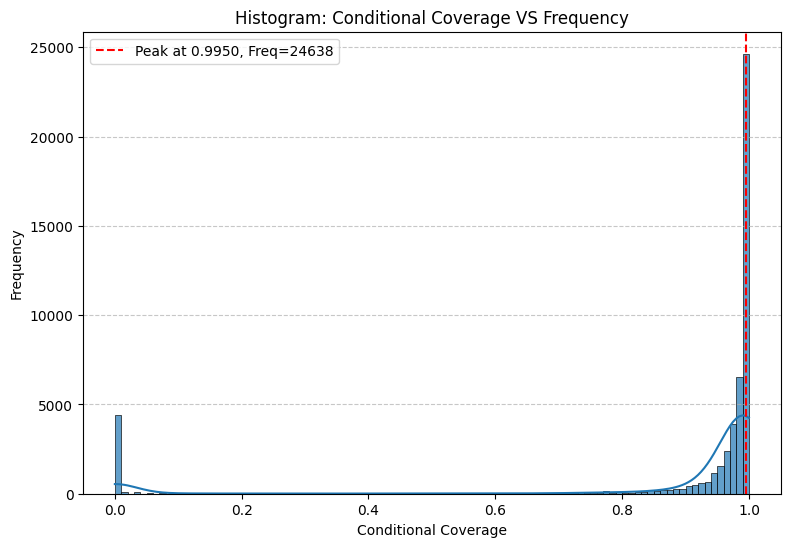

24638 (49.28%) samples reached the peak conditional coverage at 0.9950


In [2]:
aps_cifar10h_hist(model, dataset, device, num_runs, alpha, is_ground_truth=False)

APS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5643 ± 0.0036
Final Average Prediction Set Size: 1.82 ± 0.02
Final Average Coverage: 0.8972 ± 0.0046
Final Average Real Probability: 0.8771 ± 0.0043


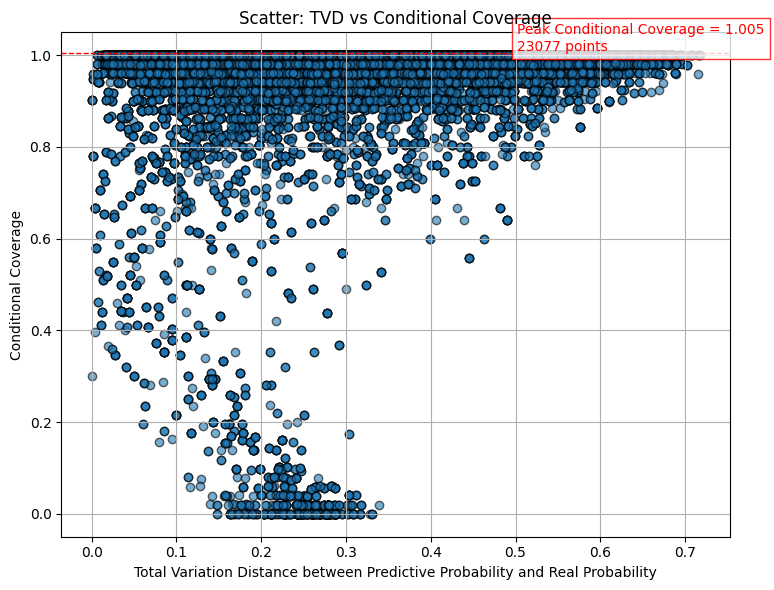

Peak Conditional Coverage = 1.005, with 23077 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.93892']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.69939']
  Real Probability Set      : ['0.88462']
Sample 3:
  Predictive Probability Set: ['0.83967']
  Real Probability Set      : ['0.98039']

--- Region 2: high TVD, low coverage ---
Sample 1:
  Predictive Probability Set: ['0.20484', '0.16523', '0.14946']
  Real Probability Set      : ['0.00000', '0.00000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.54373']
  Real Probability Set      : ['0.09615']
Sample 3:
  Predictive Probability Set: ['0.58039']
  Real Probability Set      : ['0.01961']

--- Region 3: medium TVD, medium coverage ---
Sample 1:
  Predictive Probability Set: ['0.16019', '0.11657', '0.11257', '0.11164', '0.10841']
  Real Probability Set      : ['0.00000', '0.15686', '0.58824', '0.0

In [2]:
aps_cifar10h_scatter(model, dataset, device, num_runs, alpha)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5931 ± 0.0052
Final Average Prediction Set Size: 1.52 ± 0.01
Final Average Coverage: 0.8981 ± 0.0044
Final Average Real Probability: 0.8754 ± 0.0041


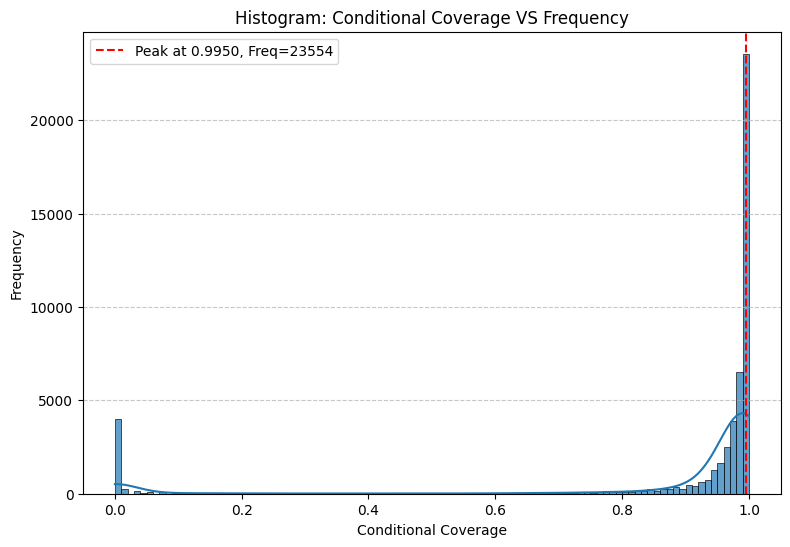

23554 (47.11%) samples reached the peak conditional coverage at 0.9950


In [3]:
raps_cifar10h_hist(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1, is_ground_truth=False)

RAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.5908 ± 0.0036
Final Average Prediction Set Size: 1.52 ± 0.01
Final Average Coverage: 0.8982 ± 0.0037
Final Average Real Probability: 0.8753 ± 0.0035


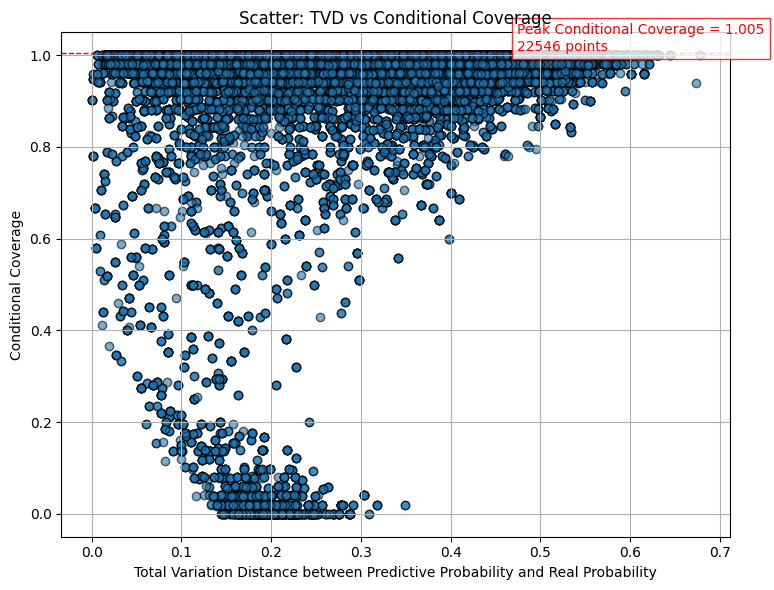

Peak Conditional Coverage = 1.005, with 22546 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83221']
  Real Probability Set      : ['1.00000']
Sample 2:
  Predictive Probability Set: ['0.80330']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.85060']
  Real Probability Set      : ['0.98000']

--- Region 2: high TVD, low coverage ---
Sample 1:
  Predictive Probability Set: ['0.28032', '0.20504']
  Real Probability Set      : ['0.05882', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.25312', '0.24794']
  Real Probability Set      : ['0.01923', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.45133']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium coverage ---
Sample 1:
  Predictive Probability Set: ['0.33882', '0.33109']
  Real Probability Set      : ['0.75000', '0.00000']
Sample 2:
  Predictive Probability Set: ['0.2735

In [3]:
raps_cifar10h_scatter(model,dataset,device, lambda_=0.2, k_reg=2, num_runs=10, alpha=0.1)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6982 ± 0.0047
Final Average Prediction Set Size: 1.18 ± 0.01
Final Average Coverage: 0.9007 ± 0.0039
Final Average Real Probability: 0.8742 ± 0.0037


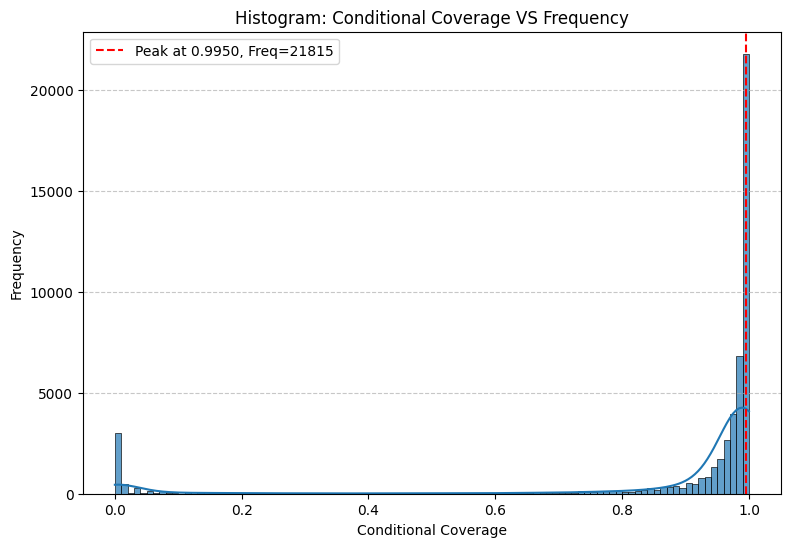

21815 (43.63%) samples reached the peak conditional coverage at 0.9950


In [2]:
saps_cifar10h_hist(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1, is_ground_truth=False)

SAPS Classification on CIFAR10-H(alpha=0.1), Start!

Running experiment 1/10...
Running experiment 2/10...
Running experiment 3/10...
Running experiment 4/10...
Running experiment 5/10...
Running experiment 6/10...
Running experiment 7/10...
Running experiment 8/10...
Running experiment 9/10...
Running experiment 10/10...
Final Average q_hat: 0.6982 ± 0.0047
Final Average Prediction Set Size: 1.18 ± 0.01
Final Average Coverage: 0.9007 ± 0.0039
Final Average Real Probability: 0.8742 ± 0.0037


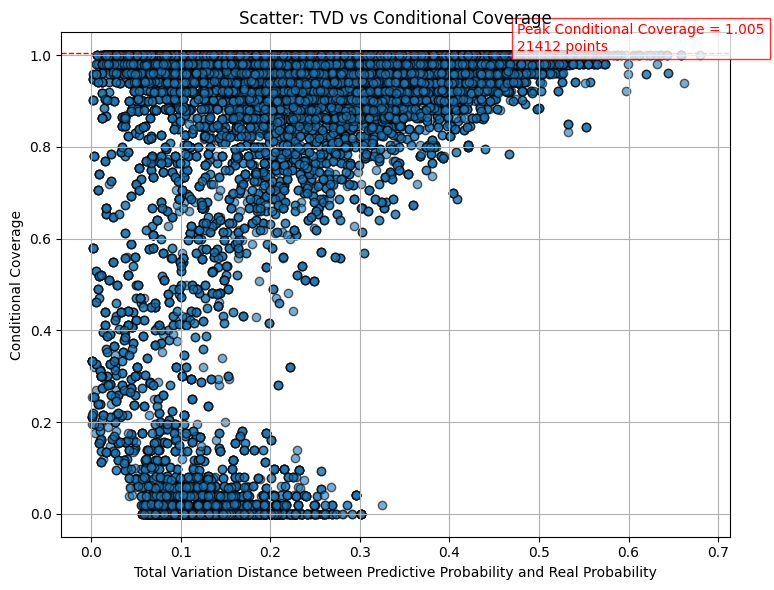

Peak Conditional Coverage = 1.005, with 21412 samples

=== Sample Points in Specific Regions ===

--- Region 1: low TVD, high Coverage ---
Sample 1:
  Predictive Probability Set: ['0.83292']
  Real Probability Set      : ['0.96078']
Sample 2:
  Predictive Probability Set: ['0.83943']
  Real Probability Set      : ['1.00000']
Sample 3:
  Predictive Probability Set: ['0.82793']
  Real Probability Set      : ['1.00000']

--- Region 2: high TVD, low Coverage ---
Sample 1:
  Predictive Probability Set: ['0.48219']
  Real Probability Set      : ['0.02000']
Sample 2:
  Predictive Probability Set: ['0.27354', '0.21878']
  Real Probability Set      : ['0.06000', '0.00000']
Sample 3:
  Predictive Probability Set: ['0.41870']
  Real Probability Set      : ['0.00000']

--- Region 3: medium TVD, medium Coverage ---
Sample 1:
  Predictive Probability Set: ['0.23202', '0.14947']
  Real Probability Set      : ['0.00000', '0.79630']
Sample 2:
  Predictive Probability Set: ['0.20569', '0.14276']
  Real 

In [3]:
saps_cifar10h_scatter(model, dataset, device, lambda_=1.0, num_runs=10, alpha=0.1)